#**Project Assignment: Online Retail [09/20/2023]**
----


Tasks:

1) Clean the dataset look and study the dataset for this part

2) Create a Dictionary with the 10 countries that have the most 'Quantity' ordered except UK

3)  Find Total Sale between two dates entered by user

4) Find each Countries Total SALE to find which Countries is highest potential customer

5) Which Customer Id has highest purchase in quantity and total and find out the country of it

6) Which Customer Id has lowest purchase in quantity and total and find out the country of it

7) Find the biggest order In Sale (Cost) which country was the order from and fiind total purchase (Cost) done by that customer ID

8) Find how many different customers are available for each country save the count in dictionary also return countries with highest and lowest customer count

9) Find which stock code was ordered the most by each country

----
Added:
Data Visualization for Question 2,3,4, and 8.

In [120]:
import pandas as pd
import numpy as np

In [121]:
import matplotlib.pyplot as plt

In [122]:
# Importing the csv file
df_raw = pd.read_csv('/content/Online_Retail.csv', encoding = 'latin-1')

In [123]:
# Test Only
print(df_raw.head(7))
print(df_raw.tail(10))
print(df_raw.shape)
print(df_raw.describe())
print(df_raw.columns)

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
5    536365     22752         SET 7 BABUSHKA NESTING BOXES         2   
6    536365     21730    GLASS STAR FROSTED T-LIGHT HOLDER         6   

    InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/10 8:26       2.55     17850.0  United Kingdom  
1  12/1/10 8:26       3.39     17850.0  United Kingdom  
2  12/1/10 8:26       2.75     17850.0  United Kingdom  
3  12/1/10 8:26       3.39     17850.0  United Kingdom  
4  12/1/10 8:26       3.39     17850.0  United Kingdom  
5  12/1/10 8:26       7.65     17850.0  United Kingdom  
6  12/1/10 8:26       4.

----
        Data Preprocessing Steps:
        1. # Stage 1: Check for null values
        2. # Stage 2: Check for negative values in significant columns ['UnitPrice']
        3. # Stage 3: Check for negative values in significant columns ['Quantity']
        4. # Stage 4: Drop the columns that are not going to be used for calculations. ['Invoice No', 'Stock Code', 'Description']
        5. # Stage 5: Add 'TotalSales' column from multiplication of values from column 'UnitPrice' & 'Quantity'
        6. # Stage 6: Change the 'InvoiceDate' to have only Dates, no Time
----






    Beginning of Data Cleaning

----

In [124]:
# Question 1:
# 1) Clean the dataset look and study the dataset for this part

# Stage 1: Check for null values

print(df_raw.isna().sum())

'''
Observation: The columns with null values are description and customerID. Since both of these data items
don't necessarily interfere with the expected analysis and output, we will not delete the rows where these
values are null.

Furthermore, customerID has 135080 null values which is 25% of total datas(541909). Deleting 25% of
values from our dataset could have a significant impact on output and therefore final analysis.

'''
print()


InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64



In [125]:
# Stage 2: Check for negative values in significant columns ['UnitPrice']

sort_UnitPrice = df_raw.sort_values(by = 'UnitPrice', ascending = True)   # dataframe to check the negative values in 'UnitPrice' by sorting it in ascending order
#print(sort_UnitPrice)

negative_values_UnitPrice = (df_raw['UnitPrice'] < 0).sum()               # Check how many negative values are there in UnitPrice columns
print(negative_values_UnitPrice)    # There are 2 negative UnitPrice values

'''
Observation:
The 2 negative UnitPrice Values are 'Bad Debt Adjustment' so its safe to delete those rows
since we are doing analysis on sales.
'''
# dataframe 'df_raw' only has the rows where the 'UnitPrice' column has positive values
df_raw = df_raw[df_raw['UnitPrice'] >= 0]
print(df_raw.shape)


2
(541907, 8)


In [ ]:
# Stage 3: Check for negative values in significant columns ['Quantity']

sort_quantity = df_raw.sort_values(by = 'Quantity', ascending = True)   # dataframe to check the negative values in 'Quantity' by sorting it in ascending order
#print(sort_quantity)

negative_values_Quantity = (df_raw['Quantity'] < 0).sum()
print('Negative values in column["Quantity"]:', negative_values_Quantity)

'''
Observation: There are 10624 negative values in 'Quantity' column
'''

# We can check the description of the rows where Quantity has negative values

df_testing_QuantityNull = df_raw[['Quantity','Description']]
df_testing_QuantityNull = df_testing_QuantityNull[df_testing_QuantityNull['Quantity'] < 0]

df_testing_QuantityNull.sort_values(by = 'Quantity')

# Checking how many unique descriptions are there for rows with null values

unique_description = df_testing_QuantityNull['Description'].unique()
print("Unique [Description]: ",len(unique_description))
# --------

'''
Observation: Since there are 2111 unique descriptions of rows that have negative values, a generic reason
why they could be negative cannot be deduced.
It could be they are returned items so including them in the dataset for sales analysis could lead to
different result than expected.
Besides, omitting 10624 datas from a dataset of 541909 is only going to short it by 1.3 %,
we can be safe to delete the rows with negative values of Quantity.

'''
# dataframe 'df_final' only has the rows where the 'Quantity' column has positive values

df_final = df_raw[df_raw['Quantity'] >= 0]
print(df_final)


In [127]:
# Stage 4:  Drop the columns that are not going to be used for calculations. ['Invoice No', 'Description']

df_final.describe
#print(df_final.sort_values(by = 'Quantity' , ascending = True))

#print(df_final.sort_values(by = 'UnitPrice', ascending = True))

# The main dataframe(df) gets the data from CleanedUP dataframe df_final with five necessary columns.

df = df_final[['InvoiceDate','StockCode','CustomerID','UnitPrice','Quantity','Country']]
df.describe()

,CustomerID,UnitPrice,Quantity
count,397924.000000,531283.000000,531283.000000
mean,15294.315171,3.898954,10.655299
std,1713.169877,35.876279,156.830617
min,12346.000000,0.000000,1.000000
25%,13969.000000,1.250000,1.000000
50%,15159.000000,2.080000,3.000000
75%,16795.000000,4.130000,10.000000
max,18287.000000,13541.330000,80995.000000


In [ ]:
# Stage 5: Add 'TotalSales' column from multiplication of values from column 'UnitPrice' & 'Quantity'

df.loc[:,'TotalSales'] = df.loc[:,'Quantity'] * df.loc[:,'UnitPrice']
#print(df.columns, "\n\n")

In [ ]:
# Stage 6: Change the 'InvoiceDate' to have only Dates, no Time

df.loc[:,'InvoiceDate'] = pd.to_datetime(df.loc[:,'InvoiceDate'])

df.loc[:,'InvoiceDate'] = df.loc[:,'InvoiceDate'].dt.date
#print(type(df['InvoiceDate']), "\n")

In [130]:
'''Testing Only'''

print(df.head(3))
print(df.tail(3))
print("\n",df.columns)

  InvoiceDate StockCode  CustomerID  UnitPrice  Quantity         Country  \
0  2010-12-01    85123A     17850.0       2.55         6  United Kingdom   
1  2010-12-01     71053     17850.0       3.39         6  United Kingdom   
2  2010-12-01    84406B     17850.0       2.75         8  United Kingdom   

   TotalSales  
0       15.30  
1       20.34  
2       22.00  
       InvoiceDate StockCode  CustomerID  UnitPrice  Quantity Country  \
541906  2011-12-09     23254     12680.0       4.15         4  France   
541907  2011-12-09     23255     12680.0       4.15         4  France   
541908  2011-12-09     22138     12680.0       4.95         3  France   

        TotalSales  
541906       16.60  
541907       16.60  
541908       14.85  

 Index(['InvoiceDate', 'StockCode', 'CustomerID', 'UnitPrice', 'Quantity',
       'Country', 'TotalSales'],
      dtype='object')


----

      End of Data Cleaning

----

In [131]:
# Assignment 2.
#2.Create a Dictionary with the 10 countries that have the most 'Quantity' ordered except UK

# Step 1: Create a dataframe with only the necessary columns ['Country', 'Quantity']

df_q2 = df[['Country', 'Quantity']]

#df_q2.head(10)
#df_q2.tail(10)

# Step2: Change the dataframe to combine the Country and sum up their quantity

df_q2 = df_q2.groupby('Country', as_index = False)['Quantity'].sum()
df_q2

# Step3: Remove the row that has Country value 'United Kingdom'

df_q2 = df_q2.drop(df_q2[df_q2['Country'] == 'United Kingdom'].index)
df_q2

# Step3: sort the dataframe in descending order and add the top ten to a dictionary
df_q2 = df_q2.sort_values(by = 'Quantity', ascending = False).head(10)
df_q2

dict_hQC = {}

len(df_q2)
df_q2.iloc[:]

for i in range(len(df_q2)):
    index = df_q2.iloc[i]
    dict_hQC[index['Country']] = index['Quantity']

for key, value in dict_hQC.items():
    print(f"{key}: {value}")

Netherlands: 200937
EIRE: 147447
Germany: 119263
France: 112104
Australia: 84209
Sweden: 36083
Switzerland: 30630
Spain: 27951
Japan: 26016
Belgium: 23237


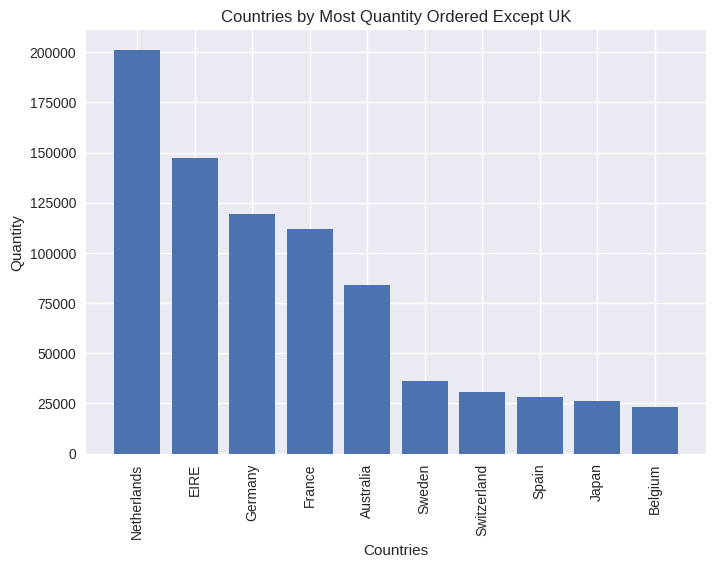

In [132]:
# Assignment 2: Data Visualization (Bar Chart)
fig, ax = plt.subplots()

countries_list = []
quantity_list = []
for key, value in dict_hQC.items():
    countries_list.append(key)
    quantity_list.append(value)

plt.xticks(rotation = 90)   # Rotates the name of countries

ax.set_ylabel('Quantity')
ax.set_xlabel('Countries')
#Titles
ax.set_title('Countries by Most Quantity Ordered Except UK')
ax.bar(countries_list,quantity_list)
plt.show()

In [145]:
# Assignment 3.
# 3. Find Total Sale between two dates entered by user

# Needed Columns: ['InvoiceDate', 'Quantity', 'UnitPrice']
df_q3 = df[['InvoiceDate','TotalSales']]

# Step1: Modify the dataframe with columns 'InvoiceDate' grouped by sum of 'TotalSales'
df_q3 = df_q3.groupby(['InvoiceDate'], as_index = False)['TotalSales'].sum()
df_q3

# Step2: Ask User for input of starting date and ending date
start_date = '2010-12-03'
#start_date = input("Enter the starting date in this format: [YYYY-MM-DD] ")
start_date = pd.Timestamp(start_date)
end_date = '2011-02-06'
#end_date = input("Enter the ending date in this format: [YYYY-MM-DD] ")
end_date = pd.Timestamp(end_date)

# Step3: Make a new dataframe with only start_date and end_date and sum the TotalSales of that dataframe

# df_alternate = df_q3[(df_q3['InvoiceDate'] >= start_date) & (df_q3['InvoiceDate'] <= end_date)]

ts = df_q3['InvoiceDate']

df_alternate = df_q3[(ts >= pd.Timestamp(start_date)) & (ts <= pd.Timestamp(end_date))]
print(df_alternate)
total_sales_in_input_dates = df_alternate['TotalSales'].sum()
print(f"Total Sales between {start_date} and {end_date} is: ${total_sales_in_input_dates}\n\n\n")

   InvoiceDate  TotalSales
2   2010-12-03    46943.71
3   2010-12-05    31774.95
4   2010-12-06    54830.46
5   2010-12-07    99618.20
6   2010-12-08    45389.98
7   2010-12-09    53586.18
8   2010-12-10    59182.92
9   2010-12-12    17329.07
10  2010-12-13    38006.71
11  2010-12-14    45254.73
12  2010-12-15    30444.62
13  2010-12-16    49352.90
14  2010-12-17    45418.33
15  2010-12-19     7534.91
16  2010-12-20    26789.13
17  2010-12-21    47304.09
18  2010-12-22     6199.97
19  2010-12-23    12076.11
20  2011-01-04    16026.08
21  2011-01-05    32634.47
22  2011-01-06    40382.85
23  2011-01-07    28836.59
24  2011-01-09    15778.20
25  2011-01-10    24569.07
26  2011-01-11    68655.59
27  2011-01-12    24693.78
28  2011-01-13    20624.64
29  2011-01-14    47576.90
30  2011-01-16     7242.06
31  2011-01-17    29333.02
32  2011-01-18    95978.05
33  2011-01-19    25934.57
34  2011-01-20    21246.99
35  2011-01-21    32640.30
36  2011-01-23    10400.25
37  2011-01-24    25733.79
3

<ipython-input-145-2baff0bdbe48>:25: FutureWarning: Comparison of Timestamp with datetime.date is deprecated in order to match the standard library behavior. In a future version these will be considered non-comparable. Use 'ts == pd.Timestamp(date)' or 'ts.date() == date' instead.
  df_alternate = df_q3[(ts >= pd.Timestamp(start_date)) & (ts <= pd.Timestamp(end_date))]


<ipython-input-135-78ebf2c2d559>:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


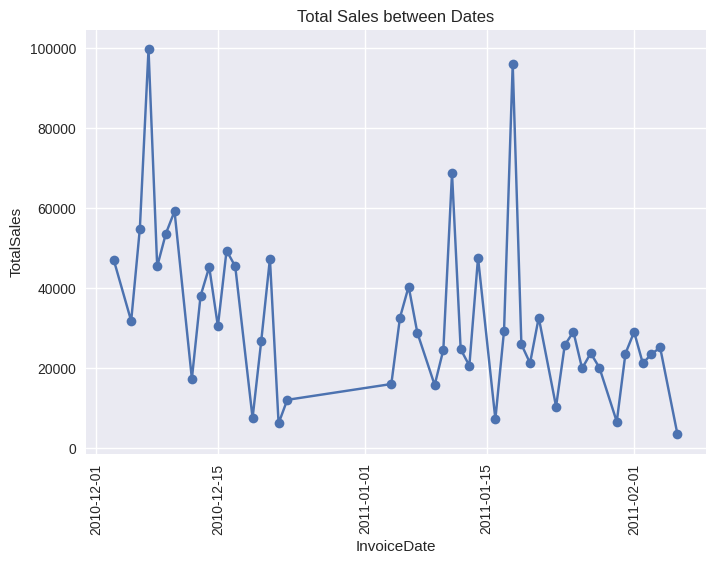

In [135]:
# Question 3: Data Visualization(Line Chart)

df_q3_dv = df_alternate

plt.style.use('seaborn')

plt.xticks(rotation = 90)   # Rotates the name of countries

plt.plot(df_q3_dv['InvoiceDate'], df_q3_dv['TotalSales'], linestyle = 'solid', marker = 'o')

plt.title('Total Sales between Dates')
plt.xlabel('InvoiceDate')
plt.ylabel('TotalSales')
plt.show()

In [136]:
# Question 4:
# Find each Countries Total SALE to find which Countries is highest potential customer.

# Step1: Dataframe with only required columns and add a column of TotalSales
# Needed Columns: ['Country', 'Total Sales']
df_q4 = df[['Country' ,'TotalSales']]

df_q4 = df_q4.groupby('Country', as_index = False)['TotalSales'].sum()
df_q4

# Step2: Sort the dataframe in descending order of TotalSales and print the value at index 0

df_q4 = df_q4.sort_values(by = 'TotalSales', ascending = False)
df_q4

print("The highest potential customer Country is:\n",df_q4.iloc[0])

The highest potential customer Country is:
 Country       United Kingdom
TotalSales       9025222.084
Name: 36, dtype: object


In [137]:
print("Each countries total sale is\n", df_q4)

Each countries total sale is
                  Country   TotalSales
36        United Kingdom  9025222.084
24           Netherlands   285446.340
10                  EIRE   283453.960
14               Germany   228867.140
13                France   209715.110
0              Australia   138521.310
31                 Spain    61577.110
33           Switzerland    57089.900
3                Belgium    41196.340
32                Sweden    38378.330
20                 Japan    37416.370
25                Norway    36165.440
27              Portugal    33747.100
12               Finland    22546.080
30             Singapore    21279.290
6        Channel Islands    20450.440
9                Denmark    18955.340
19                 Italy    17483.240
16             Hong Kong    15691.800
7                 Cyprus    13590.380
1                Austria    10198.680
18                Israel     8135.260
26                Poland     7334.650
15                Greece     4760.520
37           Unspeci

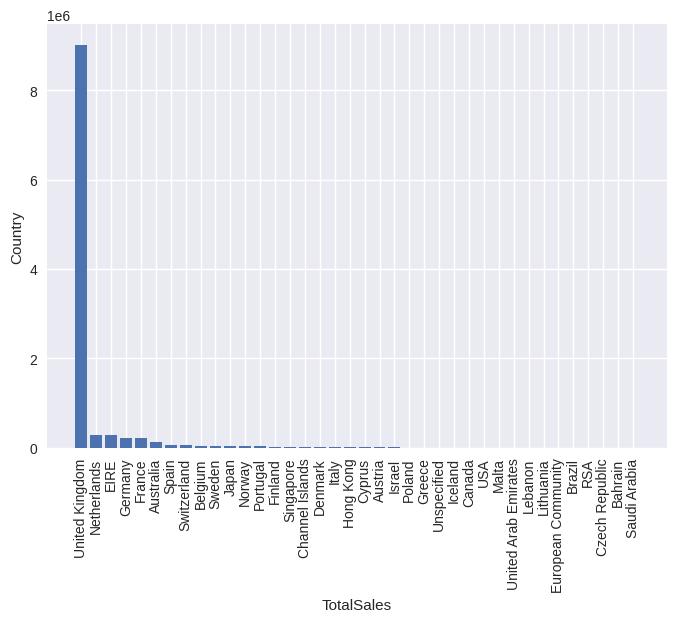

In [138]:
# Question 4: Data Visualization: Countries by TotalSales
df_q4
fig, ax = plt.subplots()

plt.xticks(rotation = 90)   # Rotates the name of countries

ax.set_ylabel('Country')
ax.set_xlabel('TotalSales')

ax.bar(df_q4['Country'], df_q4['TotalSales'])
plt.show()

In [139]:
# Question 5:
# Which Customer Id has highest purchase in quantity and total and find out the country of it

# Step1: Extract the necessary columns and add the TotalSales column
# Needed Columns: ['CustomerID', 'Quantity', 'Country', 'TotalSales']

df_q5 = df[['CustomerID', 'Quantity', 'Country', 'TotalSales']]

print(df_q5.shape)
df_q5.isna().sum()

# Step2: Safe to drop the rows with null CustomerID as we are only dealing with data that have valid CustomerID

df_q5 = df_q5.dropna()

# Step3: Group the data for customerID and add their Total Sales

df_q5_sales = df_q5.groupby(['CustomerID'], as_index = False)['TotalSales'].sum()

df_q5_sales

# Step4: Group the data for customerID and add their Quantity

df_q5_quantity = df_q5.groupby(['CustomerID'], as_index = False)['Quantity'].sum()
df_q5_quantity

# Step5: Group the data in accordance with CustomerID and the first occurence of respective country

df_individual_country = df_q5.groupby(['CustomerID'], as_index = False)['Country'].first()
df_individual_country

# Step6: Merge the three df in accordance to customerID
df_merge = pd.merge(df_q5_sales, df_q5_quantity, on='CustomerID')
df_merge = pd.merge(df_merge, df_individual_country, on='CustomerID')
df_merge


df_highest_sales = df_merge.sort_values('TotalSales', ascending = False)
df_highest_quantity = df_merge.sort_values('Quantity', ascending = False)

print("The customerID with highest sales:\n",df_highest_sales.iloc[0])
print()
print("The customerID with highest purchase quantity:\n",df_highest_quantity.iloc[0])
print()

(531283, 4)
The customerID with highest sales:
 CustomerID        14646.0
TotalSales      280206.02
Quantity           197491
Country       Netherlands
Name: 1690, dtype: object

The customerID with highest purchase quantity:
 CustomerID        14646.0
TotalSales      280206.02
Quantity           197491
Country       Netherlands
Name: 1690, dtype: object



In [140]:
# Question 6 :
# 6) Which Customer Id has lowest purchase in quantity and total and find out the country of it

print("The customerID with lowest sales:\n",df_highest_sales.iloc[-1])
print()
print("The customerID with lowest purchase quantity:\n",df_highest_quantity.iloc[-1])
print()

The customerID with lowest sales:
 CustomerID           13256.0
TotalSales               0.0
Quantity               12540
Country       United Kingdom
Name: 685, dtype: object

The customerID with lowest purchase quantity:
 CustomerID           16742.0
TotalSales             464.9
Quantity                   1
Country       United Kingdom
Name: 3220, dtype: object



----
        **Additional Questions [09/21]**
----

In [141]:
# Question 7
# Find the biggest order In Sale (Cost)
# which country was the order from and
# find total purchase (Cost) done by that customer ID

df_q7 = df_q5.sort_values(['TotalSales'], ascending = False)
print("The biggest Order in sales was $", df_q7.iloc[0]['TotalSales'])
print("The order was from country ", df_q7.iloc[0]['Country'])
print("The customerID of customer who got this was: ", df_q7.iloc[0]['CustomerID'])

# group the dataframe by customerID and sum up the TotalSales

df_q7_byCust = df_q7.groupby(['CustomerID'], as_index = False)['TotalSales'].sum()

# Search for the customerID in this df
result_cust = df_q7_byCust[df_q7_byCust['CustomerID'] == df_q7.iloc[0]['CustomerID']]

print("\nThe total purchase from this customer was:\n",result_cust)
#df_q7
#df_q7_byCust


The biggest Order in sales was $ 168469.6
The order was from country  United Kingdom
The customerID of customer who got this was:  16446.0

The total purchase from this customer was:
       CustomerID  TotalSales
3009     16446.0    168472.5


In [142]:
# Question 8.
# 8) Find how many different customers are available for each country
# save the count in dictionary
# also
# return countries with highest and lowest customer count

'''Start'''
#print(df_q7)    # from Question 7
# Group this df by country and count

df_q8 = df_q7.groupby('Country', as_index = False).size()

# Save this to a dictionary
country_occur = {}
for i in range(len(df_q8)):
  index = df_q8.iloc[i]
  country_occur[index['Country']] = index['size']

# print dictionary

for key, value in country_occur.items():
  print(f"{key}: {value}")

# sort in descending order
df_q8_sorted = df_q8.sort_values(by = 'size', ascending = False)

print("\nThe country with highest customer count is: ", df_q8_sorted.iloc[0]['Country'])
print()
print("The country with lowest customer count is: ", df_q8_sorted.iloc[-1]['Country'])
#print(df_q8_sorted)

'''
highest is United Kingdom
lowest is Saudi Arabia
'''
print()

Australia: 1185
Austria: 398
Bahrain: 17
Belgium: 2031
Brazil: 32
Canada: 151
Channel Islands: 748
Cyprus: 614
Czech Republic: 25
Denmark: 380
EIRE: 7238
European Community: 60
Finland: 685
France: 8342
Germany: 9042
Greece: 145
Iceland: 182
Israel: 248
Italy: 758
Japan: 321
Lebanon: 45
Lithuania: 35
Malta: 112
Netherlands: 2363
Norway: 1072
Poland: 330
Portugal: 1462
RSA: 58
Saudi Arabia: 9
Singapore: 222
Spain: 2485
Sweden: 451
Switzerland: 1842
USA: 179
United Arab Emirates: 68
United Kingdom: 354345
Unspecified: 244

The country with highest customer count is:  United Kingdom

The country with lowest customer count is:  Saudi Arabia



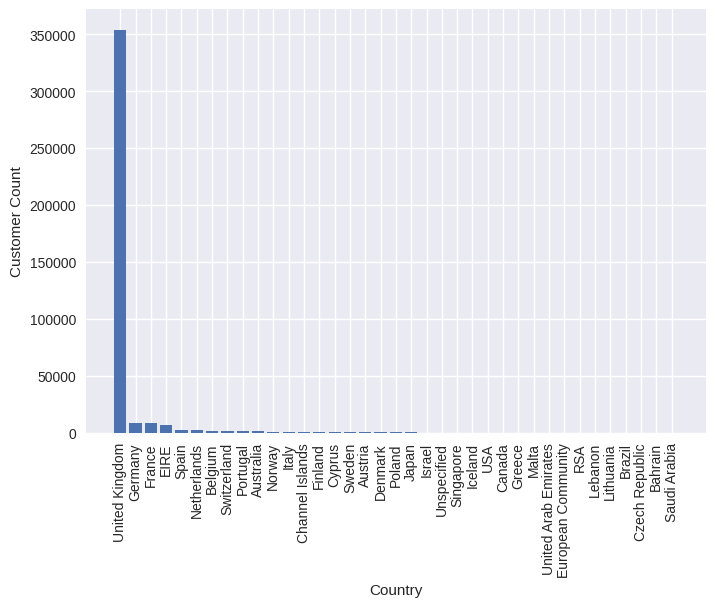

In [143]:
# Question 8. Data Visualization: Country by Customer Count

df_q8_sorted
fig, ax = plt.subplots()

plt.xticks(rotation = 90)   # Rotates the name of countries

ax.set_ylabel('Customer Count')
ax.set_xlabel('Country')

ax.bar(df_q8_sorted['Country'], df_q8_sorted['size'])
plt.show()

In [144]:
# Question 9:
# 9) Find which stock code was ordered the most by each country

# Cleaning the data 1: Selecing the necessary columns from the main dataframe
df_q9_clean = df[['Country', 'StockCode', 'Quantity']]

# Cleaning the data 2: Filter out rows with 'Unspecified' as the country
df_q9_clean = df_q9_clean[df_q9_clean['Country'] != 'Unspecified']

# Group by 'Country' and 'StockCode' and sum the relevant quantities for each StockCode
df_q9_sorted = df_q9_clean.groupby(['Country', 'StockCode'], as_index=False)['Quantity'].sum()

# Empty df
df_final = pd.DataFrame(columns=['Country', 'StockCode', 'Quantity'])

# put each countries in a list
unique_countries = df_q9_sorted['Country'].unique()
#print(unique_countries)
print(type(unique_countries))
for country in unique_countries:
    # Loop through unique countries
    this_country = df_q9_sorted[df_q9_sorted['Country'] == country]

    # Find the row with the maximum quantity for the current country
    max_quantity = this_country['Quantity'].max()  # Find the maximum quantity within the group
    df_per_country = this_country[this_country['Quantity'] == max_quantity]  # Filter for rows with the maximum quantity
    #print(df_per_country,"\n")

    # Adding the result to the same dataframe
    df_final = pd.concat([df_final, df_per_country], ignore_index=True)

print(df_final)

<class 'numpy.ndarray'>
                 Country StockCode Quantity
0              Australia     22492     2952
1                Austria     21918      288
2                Bahrain     23076       96
3                Belgium     21212      480
4                 Brazil     21430       24
..                   ...       ...      ...
56           Switzerland     22554      639
57                   USA     23366       88
58  United Arab Emirates     21700       72
59  United Arab Emirates     85215       72
60        United Kingdom     23843    80995

[61 rows x 3 columns]
